In [1]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import ml4gw
filepath = '/home/seiya.tsukamoto/aframe/layered/data/train/training_waveforms/waveforms-0.hdf5'
import sys
sys.path.append('/home/seiya.tsukamoto/aframe/projects/train/')
sys.path.append('/home/seiya.tsukamoto/aframe/libs/utils/')
from train.augmentations import WaveformProjector
from ml4gw.distributions import Cosine
from torch.distributions.uniform import Uniform
from ml4gw.utils.slicing import sample_kernels
import torch
dec_space = Cosine()
psi_space = Uniform(0, np.pi)
phi_space = Uniform(-np.pi, np.pi)
projector = WaveformProjector(['H1', 'L1'], 2048)

In [2]:
with h5py.File(filepath, 'r') as f:
    waveforms = f['waveforms']['cross'][:10000], f['waveforms']['plus'][:10000]
waveforms = np.stack(waveforms, axis = 1)

In [3]:
waveforms = torch.tensor(waveforms)
polarizations = {"cross": waveforms[:, 0, :], "plus": waveforms[:, 1, :]}
N = len(waveforms)
dec = dec_space.sample((N,))
psi = psi_space.sample((N,))
phi = phi_space.sample((N,))
responses = projector(dec = dec, psi = psi, phi = phi, **polarizations)
kernels = responses
val = np.float64(1e23)
kernels = kernels*val

In [5]:
from scipy.fft import fft, fftfreq
import numpy as np
N = 1024
T = 1.0 / 2048
space = np.arange(5, 9, .5)
out = np.zeros((len(space), 512))
for i in range(1000):
    for j in range(2):
        for k, t0 in enumerate(space):
            yf = fft(kernels[i][j][int((t0-.25)*2048):int((t0+.25)*2048)])
            out[k] += 2.0/N * np.abs(yf[0:N//2])

5.0 /pm 0.25


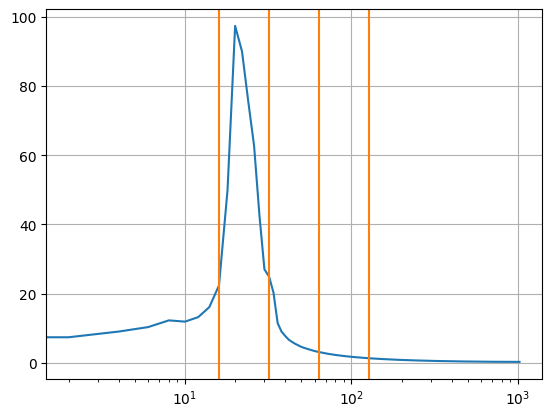

5.5 /pm 0.25


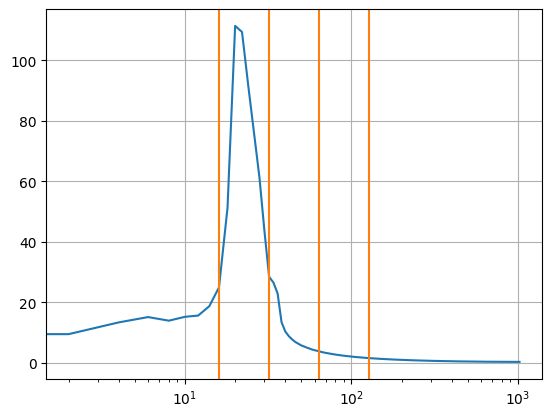

6.0 /pm 0.25


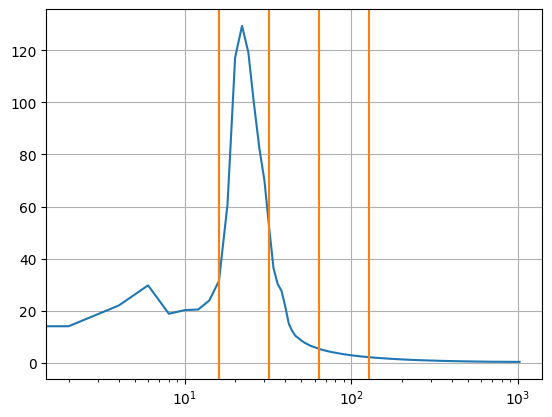

6.5 /pm 0.25


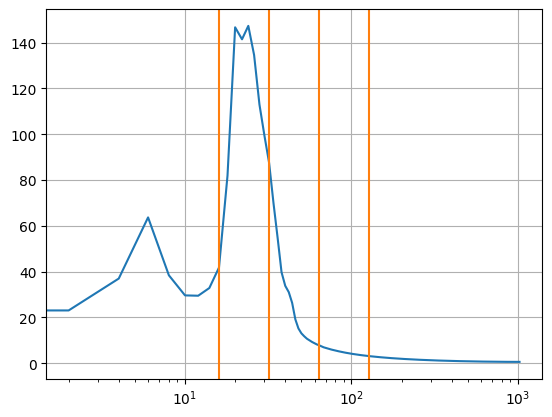

7.0 /pm 0.25


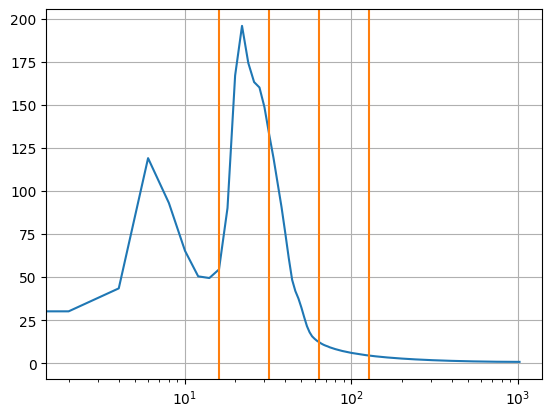

7.5 /pm 0.25


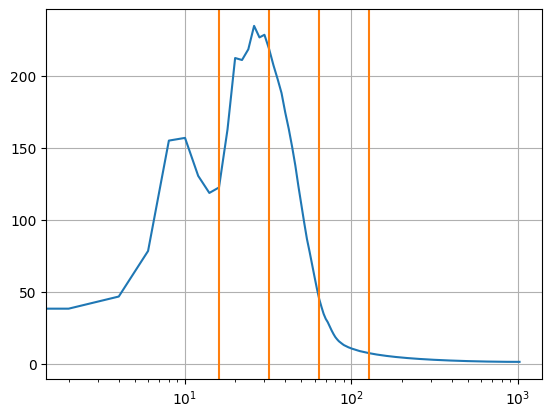

8.0 /pm 0.25


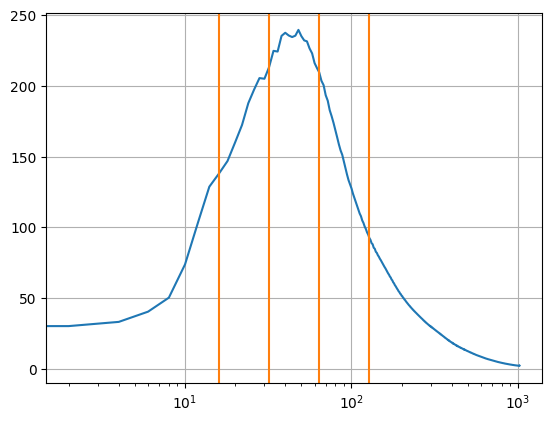

8.5 /pm 0.25


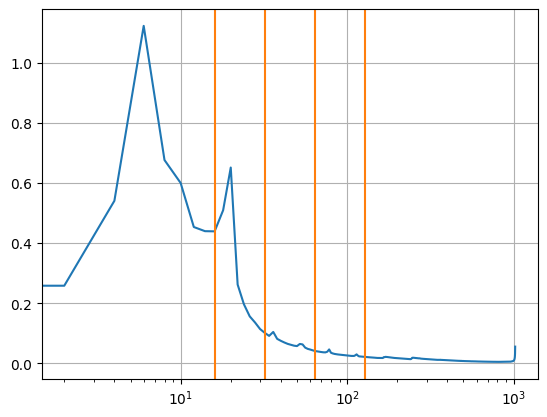

In [6]:
xf = fftfreq(N, T)[:N//2]
for k, t0 in enumerate(space):
    print(f'{t0} /pm {.25}')
    plt.plot(xf, out[k])
    plt.xscale('log')
    plt.axvline(16, c = 'C1')
    plt.axvline(32, c = 'C1')
    plt.axvline(64, c = 'C1')
    plt.axvline(128, c = 'C1')
    plt.grid()
    plt.show()